In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
from collections import Counter
import seaborn as sns 
cnt_train_labels = [class_names[x] for x in train_labels]
cnt_test_labels = [class_names[x] for x in test_labels]

print(f"train_label num : {len(cnt_train_labels)}, test_label num : {len(cnt_test_labels)}")

train_label num : 60000, test_label num : 10000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'count of test labels')

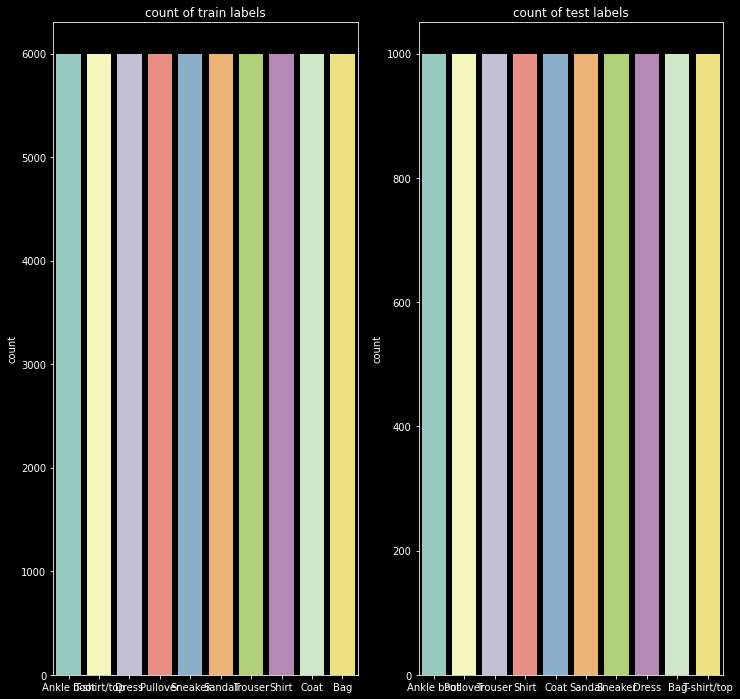

In [10]:
plt.style.use('dark_background')
#데이터 EDA - training data
plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
sns.countplot(cnt_train_labels)
plt.title("count of train labels")

#데이터 EDA - test data
plt.subplot(1,2,2)
sns.countplot(cnt_test_labels)
plt.title('count of test labels')

#균일한 수가 들어가 있다는 것을 알 수 있다. 


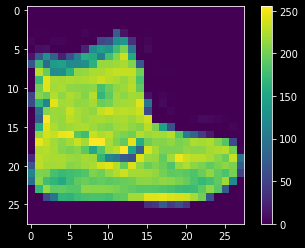

In [11]:
# 이미지 시각화

plt.figure()
plt.imshow(train_images[0][:, ::-1]) # 슬라이싱  ::-1 : 역순으로 처음부터 끝까지 . > 행은 냅두고 열을 거꾸로  > y축대칭 
plt.colorbar()
plt.grid(False)
plt.show()

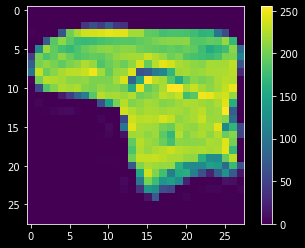

In [12]:
plt.figure()
plt.imshow(train_images[0][::-1,:]) # x축대칭. ::-1이니까. 
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
def plot_sample_images(data_sample_images, data_sample_labels, cmap='Blues'):
  f, ax = plt.subplots(5,8,figsize = (16,16)) #subplots라는게 따로 있음.  
  for i , img in enumerate(data_sample_images):
    ax[i//8, i%8].imshow(img, cmap = cmap)

  plt.show()

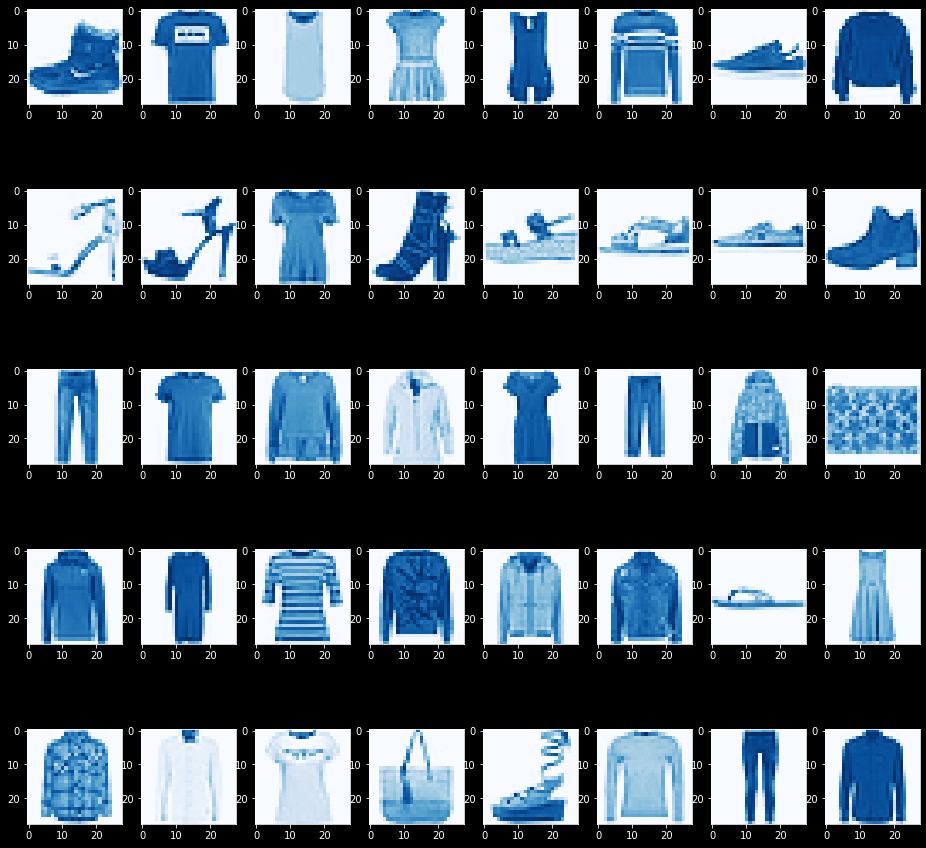

In [19]:
plot_sample_images(train_images[:40], train_labels[:40])

In [27]:
print(train_images[0].shape)
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)), #데이터의 입력 shape와 같아야 함. 
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10, activation = 'softmax')

])

train_images = train_images/255.0
test_images = test_images/255.0

(28, 28)


In [28]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), # softmax를 이미썼기때문에 이렇게 해주는 것(False로) 또 그렇게되면 위처럼 /255.0해줘야함. 
              metrics = ['accuracy'])

              

In [29]:
train_model = model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5012 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3151 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2811 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2673 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2485 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

([<matplotlib.patches.Wedge at 0x7f3c498857f0>,
 [Text(-1.1, 1.3471114790620887e-16, '0.5'),
  Text(1.1, -2.6942229581241775e-16, '0.5')])

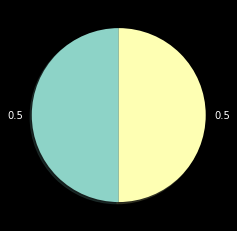

In [30]:
def np_softmax(x):
  exp_x = np.exp(x - np.max(x)) # np.exp : e의 몇승 ~ 으로 나타냄.  
  return exp_x/exp_x.sum()


x = np.array([1.0, 1.0])
y = np_softmax(x)
ratio = y 
labels = y
plt.pie(ratio, labels = labels, shadow = True, startangle=90)



In [31]:
import time
#지난 시간 측정
s_time = time.time()
test_loss , test_acc = model.evaluate(test_images, test_labels, batch_size = 128)
print(f"elapsed time : {time.time() - s_time}")

79/79 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8861
elapsed time : 0.3064076900482178


In [34]:
print(f"tset acc : {test_acc:.4f}")

tset acc : 0.8861


In [35]:
train_model.history

{'accuracy': [0.824566662311554,
  0.8647833466529846,
  0.8758333325386047,
  0.8847500085830688,
  0.8899000287055969,
  0.8956500291824341,
  0.9007333517074585,
  0.9041000008583069,
  0.9069666862487793,
  0.910099983215332],
 'loss': [0.5012181401252747,
  0.37553057074546814,
  0.33866003155708313,
  0.31509390473365784,
  0.29622209072113037,
  0.2811456322669983,
  0.2672822177410126,
  0.2575020492076874,
  0.24854029715061188,
  0.24045151472091675]}

In [37]:
print(train_model.history['accuracy'])
print(train_model.history['loss'])


[0.824566662311554, 0.8647833466529846, 0.8758333325386047, 0.8847500085830688, 0.8899000287055969, 0.8956500291824341, 0.9007333517074585, 0.9041000008583069, 0.9069666862487793, 0.910099983215332]
[0.5012181401252747, 0.37553057074546814, 0.33866003155708313, 0.31509390473365784, 0.29622209072113037, 0.2811456322669983, 0.2672822177410126, 0.2575020492076874, 0.24854029715061188, 0.24045151472091675]


In [39]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) 


In [40]:
predictions = prob_model.predict(test_images)
np.argmax(predictions[0])

9

In [41]:
test_labels[0]

9

In [43]:
def plot_images(i, prediction_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm. binary_r)

  predicted_label = np.argmax(prediction_array)
  if predicted_label == true_label:
    color = 'green'
  
  else : 
    color = 'red'

  plt.xlabel(f"prediction : {class_names[predicted_label]} {100*np.max(prediction_array):2.0f}, truth: {class_names[true_label]}", color = color)

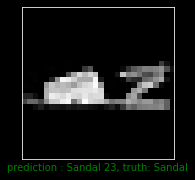

In [46]:
index = 420
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_images(index, predictions[index], test_labels, test_images)
plt.show()